# 11.1.1

In [4]:
## 2차원 데이터셋 생성 ##
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=150,
               n_features=2,
               centers=3,
               cluster_std=0.5,
               shuffle=True,
               random_state=0)

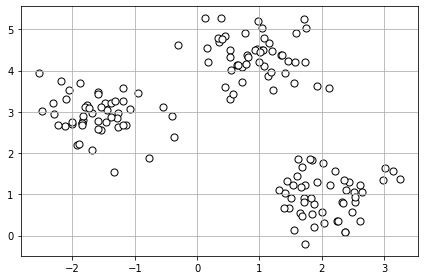

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

### 사이킷런 cluster 모듈의 KMeans 클래스 적용

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, #클러스터 개수 3으로 지정
            init='random',
            n_init=10, # k-평균 군집 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 열번 실행하여 가장 낮은 SSE를 만드는 하나를 최종 모델로 선택 
            max_iter=300, #한번의 실행에서 수행할 최대 반복 횟수 지정
            tol=1e-04,#수렴을 결정하는 클러스터 내 제곱 오차합의 변화량에 대한 허용 오차 조정 
            random_state=0)

y_km = km.fit_predict(X)

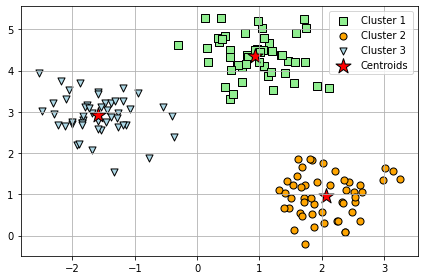

In [8]:
plt.scatter(X[y_km == 0, 0],
            X[y_km==0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250, c='red',
            marker='*',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)

plt.grid()
plt.tight_layout()
plt.show()


# 엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

In [9]:
print('왜곡: %.2f ' % km.inertia_) 

왜곡: 72.48 


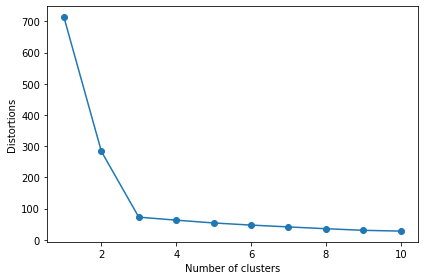

In [10]:
## 엘보우 방법 ##

distortions = []

for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
  
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()


# 실루엣 그래프로 군집 품질을 정량화 

In [11]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

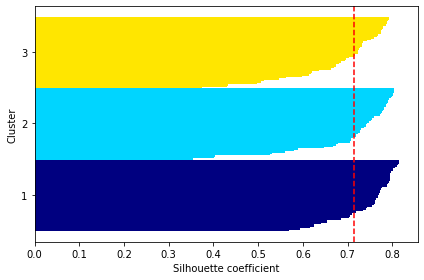

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks=[]
for i, c in enumerate(cluster_labels):
  c_silhoutte_vals = silhouette_vals[y_km == c]
  c_silhoutte_vals.sort()
  y_ax_upper += len(c_silhoutte_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhoutte_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhoutte_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')

plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### 나쁜 군집에 대한 실루엣 그래프 

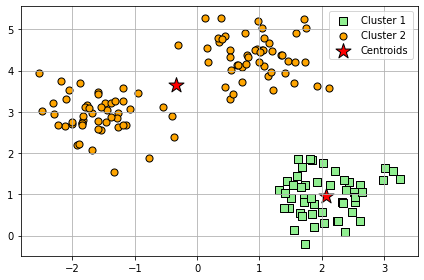

In [15]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)


plt.scatter(X[y_km == 0, 0],
            X[y_km==0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')


plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250, c='red',
            marker='*',
            edgecolor='black',
            label='Centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

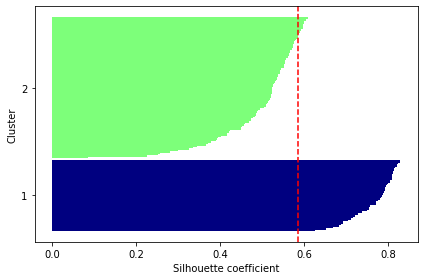

In [16]:
## 실루엣 그래프로 그려서 평가 ##

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks=[]

for i, c in enumerate(cluster_labels):
  c_silhoutte_vals = silhouette_vals[y_km == c]
  c_silhoutte_vals.sort()
  y_ax_upper += len(c_silhoutte_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhoutte_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhoutte_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')

plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

# 계층적인 트리로 클러스터 조직화

## 상향식으로 클러스터 묶기 

In [10]:
## 거리 행렬 계산 ##
import numpy as np
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels=['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## 거리 행렬에서 계층 군집 수행 

In [11]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels, index=labels)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
## 완전 연결 병합 ##

from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [14]:
## 올바른 연결 행렬 생성 방식 ##

#축약된 거리 행렬#
#row_clusters = linkage(pdist(df, metric='euclidean', method='complete'))

#원본 샘플 행렬 
row_clusters = linkage(df.values, 
                       method='complete',
                       metric='euclidean')

In [15]:
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust'],
             index = ['cluster %d' %(i+1) for i in 
                      range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


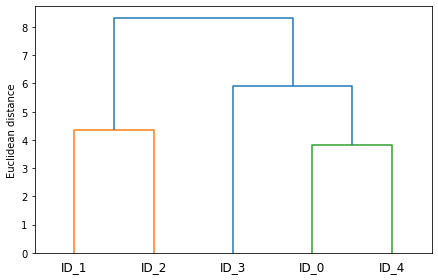

In [17]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters,
                       labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## 히트맵에 덴드로그램 연결하기

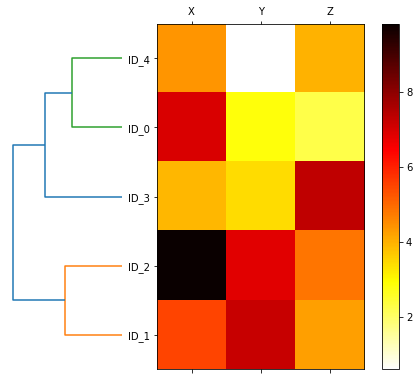

In [20]:
## 새로운 figure 객체를 만들고 add_axes 메서드를 사용해서 덴드로그램의 x축 위치, y축 위치, 너비, 높이 지정.
## 덴드로그램을 반시계 방향으로 90도 회전

fig = plt.figure(figsize=(8, 8), facecolor='white')
axd=fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

## 파이썬 딕셔너리인 덴드로그램 객체의 leaves 키에서 얻은 클러스터 레이블을 따라 원본 DataFrame에 있는 데이터 재정렬
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

## 재정렬된 DataFrame에서 히트맵을 만들고 덴드로그램 다음에 위치
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

## 축 눈금을 제거하고 그래프 테두리 감추기
## 컬러 막대를 추가하고 특성과 샘플 이름을 각각 x축과 y축 눈금의 레이블로 할당
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
  i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()

## 사이킷런에서 병합 군집 사용 

In [21]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels=ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)


클러스터 레이블: [1 0 0 2 1]


In [22]:
# n_clusters=2

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels=ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [0 1 1 0 0]
